# Fitting of Statistical Distribution

## Contents
     1) Fit Uniform Distribution using Simulated Data
     2) Fit Normal Distribution using Simulated Data
     3) Define Function



## 1) Fit Uniform Distribution using Simulated Data

In [26]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# the below line generate the uniform data
data = np.random.random(10000)

(array([1068.,  985.,  993., 1002.,  978.,  975.,  998.,  992.,  999.,
        1010.]),
 array([5.89806706e-06, 9.99822811e-02, 1.99958664e-01, 2.99935047e-01,
        3.99911430e-01, 4.99887813e-01, 5.99864196e-01, 6.99840579e-01,
        7.99816962e-01, 8.99793345e-01, 9.99769728e-01]),
 <a list of 10 Patch objects>)

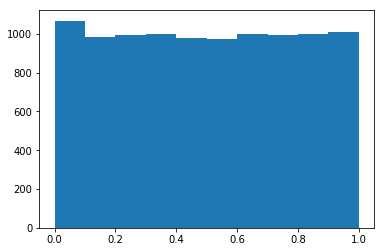

In [3]:
# plot the histogram
plt.hist(data)

In [4]:
# taking some distributions
distributions = [st.laplace, st.norm, st.uniform ,st.alpha]

In [6]:
# Gives the Best of fit among the distributions in the list "distributions"
mles = []
for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))

Best fit reached using uniform, MLE value: -2.3619792000006297


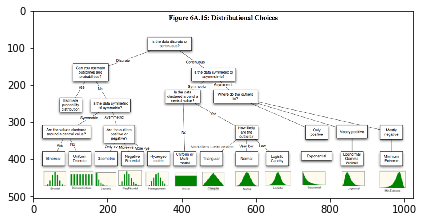

In [7]:
# just for reference
from skimage import io
io.imshow(io.imread("https://analyticsbuddhu.files.wordpress.com/2017/02/overview-prob-distr.png"))
io.show()

## 2) Fit Normal Distribution using Simulated Data

In [8]:
data = np.random.normal(0,1,10000) # (mu, sigma, no.of obs)

(array([  1.,   0.,   0.,   1.,   2.,   2.,   0.,   1.,   2.,   2.,   1.,
          4.,   4.,   5.,   7.,  11.,  11.,  11.,  14.,  29.,  23.,  21.,
         33.,  29.,  45.,  55.,  55.,  65.,  72.,  72.,  91.,  98., 118.,
        161., 160., 142., 182., 186., 212., 216., 234., 244., 257., 266.,
        259., 273., 301., 277., 291., 312., 284., 287., 293., 304., 279.,
        286., 296., 272., 240., 243., 224., 233., 222., 184., 168., 173.,
        156., 129., 120.,  79.,  95.,  74.,  71.,  51.,  50.,  58.,  46.,
         34.,  33.,  28.,  33.,  19.,  17.,  11.,   8.,  11.,   5.,   6.,
          8.,   4.,   1.,   3.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.]),
 array([-3.86212424, -3.7858907 , -3.70965715, -3.6334236 , -3.55719005,
        -3.48095651, -3.40472296, -3.32848941, -3.25225586, -3.17602232,
        -3.09978877, -3.02355522, -2.94732167, -2.87108813, -2.79485458,
        -2.71862103, -2.64238748, -2.56615394, -2.48992039, -2.41368684,
        -2.33745329, -2.26

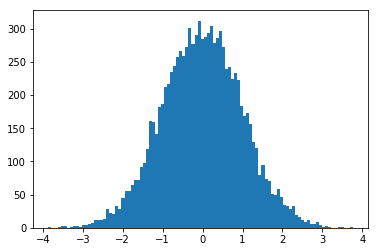

In [9]:
# plot the histogram
plt.hist(data, bins = 100)

In [20]:
# taking some distributions
distributions_all = [       
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

In [21]:
# Gives the Best of fit among the distributions in the list "distributions"
mles = []
distributions = []
for distribution in distributions_all:
    try:
        pars = distribution.fit(data)
        mle = distribution.nnlf(pars, data)
        mles.append(mle)
        distributions.append(distribution)
    except:
        continue

# Gives the top distributions 
results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))

Best fit reached using vonmises, MLE value: -617612.493481327


### Gives the all distributions with sorted order
(the distributions which listed first does fit better than which listed last)

In [31]:
results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])
# print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))
# Rank the Distributions (Sorted)
# create a dataframe
df = {}
df["Distribution_names"] = [i[0].name for i in best_fit]
df["MLE Value Sorted"] = [i[1] for i in best_fit]
df = pd.DataFrame(df)
df

,Distribution_names,MLE Value Sorted
0,vonmises,-6.176125e+05
1,kstwobign,-4.178646e+05
2,foldnorm,1.418724e+04
3,gennorm,1.418774e+04
4,beta,1.418791e+04
5,johnsonsb,1.418791e+04
6,gengamma,1.418794e+04
7,pearson3,1.418801e+04
8,powernorm,1.418803e+04
9,norm,1.418805e+04


## 3) Define Function

In [42]:
def Fitting_Distribution(data):
    # import libraries
    import numpy as np
    import pandas as pd
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')

    # taking all important distributions
    distributions_all = [       
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    # Gives the Best of fit among the distributions in the list "distributions"
    mles = []
    distributions = []
    for distribution in distributions_all:
        try:
            pars = distribution.fit(data)
            mle = distribution.nnlf(pars, data)
            mles.append(mle)
            distributions.append(distribution)
        except:
            continue
    results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
    best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])
    # print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))
    # Rank the Distributions (Sorted)
    # create a dataframe
    df = {}
    df["Distribution_names"] = [i[0].name for i in best_fit]
    df["MLE Value Sorted"] = [i[1] for i in best_fit]
    df = pd.DataFrame(df)
    # plot the histogram
    plt.hist(data, bins = 100)
    return df

▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-
The Histogram of the Given Data
▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-▪️-


,Distribution_names,MLE Value Sorted
0,vonmises,-6.176125e+05
1,kstwobign,-4.178646e+05
2,foldnorm,1.418724e+04
3,gennorm,1.418774e+04
4,beta,1.418791e+04
5,johnsonsb,1.418791e+04
6,gengamma,1.418794e+04
7,pearson3,1.418801e+04
8,powernorm,1.418803e+04
9,norm,1.418805e+04


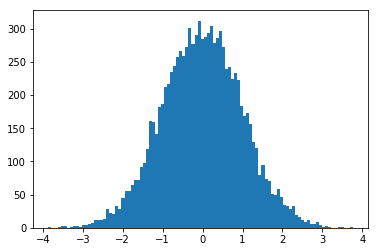

In [44]:
Fitting_Distribution(data)

#### Assign the table to Variable Name "data_fitted_distributions"

In [45]:
data_fitted_distributions = Fitting_Distribution(data)

,Distribution_names,MLE Value Sorted
0,vonmises,-6.176125e+05
1,kstwobign,-4.178646e+05
2,foldnorm,1.418724e+04
3,gennorm,1.418774e+04
4,beta,1.418791e+04
5,johnsonsb,1.418791e+04
6,gengamma,1.418794e+04
7,pearson3,1.418801e+04
8,powernorm,1.418803e+04
9,norm,1.418805e+04
